# 단층 퍼셉트론 

# 1. AND 게이트

In [93]:
from pandas import DataFrame
import numpy as np

In [6]:
x1 = [0,0,1,1] # 1 번째 인풋 값
x2 = [0,1,0,1] # 2 번째 인풋 값

In [7]:
and_data = {'x1': [0, 0, 1, 1]
           ,'x2': [0, 1, 0, 1]
           ,'y': [0, 0, 0, 1]}

In [10]:
df_and = DataFrame(and_data)

In [12]:
df_and #and 데이터 프레임 생성

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


# 2. 파이썬으로 AND 게이트 만들기(임계값(θ)을 이용)

만약 y = 0 이면, (w1 * x1) + (w2 * x2) <= 임계값(theata)

만약 y = 1 이면, (w1 * x1) + (w2 * x2) > 임계값(theata)

임계값에 미달 될 경우 0을 출력, 
임계값을 초과 할 경우 1을 출력

In [548]:
def and_gate_theta(x1, x2):#numpy 를 사용하지 않고
    w1, w2, theta = 0.5, 0.5, 0.7 #가중치(W)는 다양한 값이 나올 수 있음.(0.5, 0.5, 0.8) 등등
    sigma = (w1*x1) + (w2*x2)# y 값 계산
    if sigma <= theta: #임계값에 미달 될 경우
        return 0
    elif sigma > theta: #임계값 이상이 될 경우
        return 1
print(and_gate(0,0))
print(and_gate(0,1))
print(and_gate(1,0))
print(and_gate(1,1))

0
0
0
1


# 3. 파이썬으로 AND 게이트 만들기(편향(bais)을 이용)
임계값(theata)를 -b 로 치환,

만약 y = 0 이면, (w1*x1) + (w2*x2) + b <= 0 

만약 y = 1 이면, (w1*x1) + (w2*x2) + b > 0 

으로 변경이 가능함. 여기서 b를 편향(bias)이라고 함.

즉, (입력신호 X 가중치 + 편향)을 계산했을 때, 값이 0을 넘으면 1, 아니면 0을 출력한다.


In [551]:
def and_gate_bais(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7 #가중치(W)는 다양한 값이 나올 수 있음.(0.5, 0.5, 0.8) 등등
    b = -theta# 임계값을 -b로 치환함.
    sigma = b + (w1*x1) + (w2*x2)
    if sigma <= 0:
        return 0
    elif sigma > 0:
        return 1
# 0.7이 bias 0보다 커야함
print(and_gate_bais(0,0))
print(and_gate_bais(0,1))
print(and_gate_bais(1,0))
print(and_gate_bais(1,1))

0
0
0
1


# 4. 계단 함수(활성화 함수) 만들기
신경망에서는 보통의 퍼셉트론과 달리 활성화 함수를 사용한다.

퍼셉트론 함수는 0 or 1만을 출력 하는데, 이를 활성화 함수로 표현하면 

계단함수로 표현 할 수 있다.

In [589]:
import matplotlib.pyplot as plt
import numpy as np

In [590]:
x = np.arange(-3.0, 3.0, 0.01)# -3 ~ 3 까지 0.01 간격으로 numpy 리스트 생성
def step_activation_fun(z):#계단 함수
    y = x > 0 #거짓이면 False, 참이면 True
    return y.astype(np.int)#데이터 형 (False,Ture)를 (0,1)형태로 변환

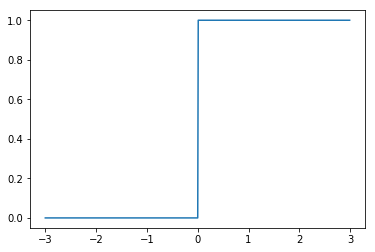

In [591]:
plt.plot(x,step_activation_fun(x))#계단 활성화 함수 그리기

In [167]:
def and_gate_numpy(x1, x2):#numpy를 사용하고 편향추가 시킴
    x = np.array([x1, x2])#x 값을 배열로 변환 1 X 2
    w = np.array([0.5, 0.5])# w 값
    theta = np.array([0])
    b = -0.7 # 편향
    y = np.sum(w*x) + b
    if y <= theta:
        return 0
    elif y > theta:
        return 1

In [45]:
for row in df_and.iterrows():# df_and 데이터에서 한 행씩 가져오기
    pred_y = and_gate(row[1].x1, row[1].x2)
    print("실제 값:",row[1].y,"/ 예측 값:", pred_y)

실제 값: 0 / 예측 값: 0
실제 값: 0 / 예측 값: 0
실제 값: 0 / 예측 값: 0
실제 값: 1 / 예측 값: 1


# 5. AND 게이트를 그래프로 그려보자

In [783]:
# Axes3D 객체를 생성 후 3차원 그래프를 그리는 멤버함수 호출방식
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show_and_perceptron(w1 = 0.5, w2 = 0.5, b = -0.7):# NAND 는 부호를 전부 뒤집으면 된다. -0.5, -0.5, 0.7
    fig = plt.figure()#그림 생성
    ax = fig.add_subplot(111, projection='3d') 
    #fig.set_size_inches(6, 6, 6)# 크기 셋팅
    X1 = np.arange(0.0, 1.0, 0.01) 
    X2 = np.arange(0.0, 1.0, 0.01) 
    X1, X2 = np.meshgrid(X1, X2) 
    Z = b + X1*w1 + X2*w2
    
    # Plot the surface. 
    ax.plot_surface(X1, X2, Z, linewidth=0)
    
    # Y가 0일때. b + W1X1 + W2X2 = 0
    ax.plot_surface(X1, X2, np.zeros([1,1]), linewidth=1)

    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')

    ax.invert_xaxis()
    ax.scatter(0, 0, (w1*0) + (w2*0) + b, c='r', marker='x')#계단 함수 적용전
    ax.scatter(0, 1, (w1*0) + (w2*1) + b, c='r', marker='x')#계단 함수 적용전
    ax.scatter(1, 0, (w1*1) + (w2*0) + b, c='r', marker='x')#계단 함수 적용전
    ax.scatter(1, 1, (w1*1) + (w2*1) + b, c='r', marker='o')#계단 함수 적용전
    
    ax.scatter(0, 0, and_gate_bais(0,0), c='b', marker='*')#계단 함수 적용
    ax.scatter(0, 1, and_gate_bais(0,1), c='b', marker='*')#계단 함수 적용
    ax.scatter(1, 0, and_gate_bais(1,0), c='b', marker='*')#계단 함수 적용
    ax.scatter(1, 1, and_gate_bais(1,1), c='b', marker='*')#계단 함수 적용

    plt.show()

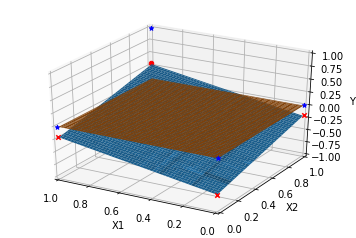

In [784]:
show_and_perceptron()

# 6. OR 게이트도 만들고, 시각화 해보자

In [789]:
def or_gate_bais(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.2 #가중치(W)는 다양한 값이 나올 수 있음.(0.5, 0.5, 0.8) 등등
    b = -theta# 임계값을 -b로 치환함.
    sigma = b + (w1*x1) + (w2*x2)
    if sigma <= 0:
        return 0
    elif sigma > 0:
        return 1
# 0.7이 bias 0보다 커야함
print(and_gate_bais(0,0))
print(and_gate_bais(0,1))
print(and_gate_bais(1,0))
print(and_gate_bais(1,1))

0
0
0
1


In [790]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show_or_perceptron(w1 = 0.5, w2 = 0.5, b = -0.2): #가중치 값과 편향 값만 수정 하면된다.
    fig = plt.figure()#그림 생성
    ax = fig.add_subplot(111, projection='3d') 
    #fig.set_size_inches(6, 6, 6)# 크기 셋팅
    X1 = np.arange(0.0, 1.0, 0.01) 
    X2 = np.arange(0.0, 1.0, 0.01) 
    X1, X2 = np.meshgrid(X1, X2) 
    Z = b + X1*w1 + X2*w2
    
    # Plot the surface. 
    ax.plot_surface(X1, X2, Z, linewidth=0)
    
    # Y가 0일때. b + W1X1 + W2X2 = 0
    ax.plot_surface(X1, X2, np.zeros([1,1]), linewidth=1)

    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')

    ax.invert_xaxis()
    ax.scatter(0, 0, (w1*0) + (w2*0) + b, c='r', marker='x')#계단 함수 적용전
    ax.scatter(0, 1, (w1*0) + (w2*1) + b, c='r', marker='o')#계단 함수 적용전
    ax.scatter(1, 0, (w1*1) + (w2*0) + b, c='r', marker='o')#계단 함수 적용전
    ax.scatter(1, 1, (w1*1) + (w2*1) + b, c='r', marker='o')#계단 함수 적용전
    
    ax.scatter(0, 0, or_gate_bais(0,0), c='b', marker='*')#계단 함수 적용
    ax.scatter(0, 1, or_gate_bais(0,1), c='b', marker='*')#계단 함수 적용
    ax.scatter(1, 0, or_gate_bais(1,0), c='b', marker='*')#계단 함수 적용
    ax.scatter(1, 1, or_gate_bais(1,1), c='b', marker='*')#계단 함수 적용
    
    plt.show()

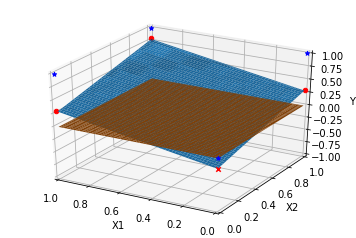

In [791]:
show_or_perceptron()